In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/churn

/content/drive/MyDrive/churn


In [ ]:
#Pandas là một thư viện mã nguồn mở được xây dựng dựa trên NumPy, sử dụng thao tác và phân tích dữ liệu
import pandas as pd
#Numpy (np) là một thư viện lõi phục vụ cho khoa học máy tính của Python, 
#hỗ trợ cho việc tính toán các mảng nhiều chiều, có kích thước lớn với các hàm đã được tối ưu áp dụng 
#lên các mảng nhiều chiều đó. 
import numpy as np
# Thư viện sử dụng để vẽ đồ thị 
import matplotlib.pyplot as plt
# sử dụng với  thư viên Plt để vẽ đồ thị
import seaborn as sns
# metrics sử dụng để dự đoán kết quả dộ chính xác (accuracy_score dộ chính xác trung bình) 
#(confusion_matrix su dụng để in ma trận ) (f1_score Liệt kê tất cả những chỉ số  )
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn import  metrics 
# câu lệnh của Jupyter Notebook để vẽ được các đồ thị bên trong cell của Jupyter Notebook. 
%matplotlib inline
# train_test_split Sử dung để chia các tập train , test, val. 
from sklearn.model_selection import train_test_split
# LogisticRegression Sử dung để giải quyết bài toán hồi quy logicstic 
from sklearn.linear_model import LogisticRegression 
# sử dụng để biểu diễn trực quan của confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#xóa cột customerID
df = df.drop(columns="customerID")

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

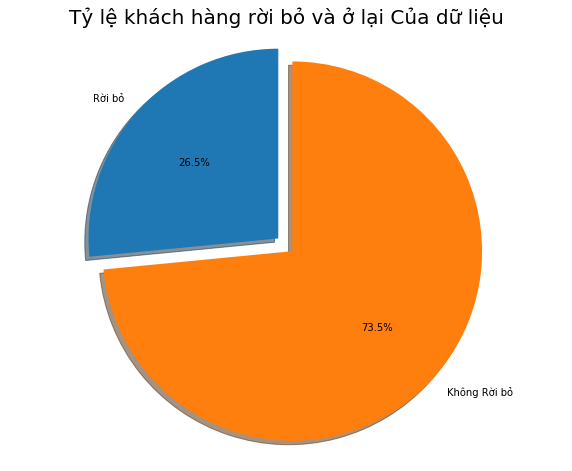

In [ ]:
# su dung de ve do thi
pd.options.display.max_rows = None
pd.options.display.max_columns = None
labels = 'Rời bỏ', 'Không Rời bỏ'
sizes = [df.Churn[df['Churn']=='Yes'].count(), df.Churn[df['Churn']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Tỷ lệ khách hàng rời bỏ và ở lại Của dữ liệu", size = 20)
plt.show()

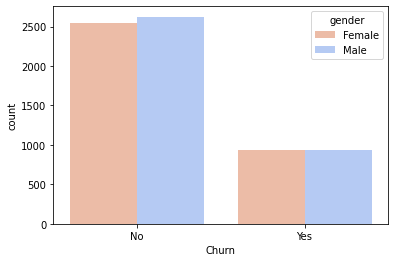

In [ ]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

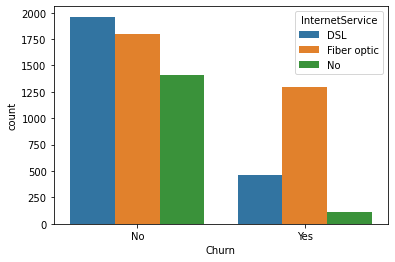

In [ ]:
sns.countplot(x='Churn',data=df, hue='InternetService')

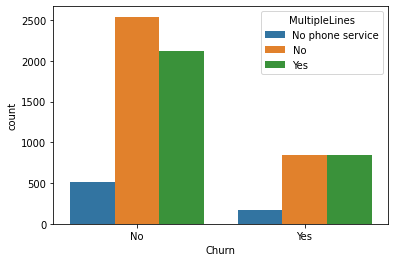

In [ ]:
sns.countplot(x='Churn',data=df, hue='MultipleLines')

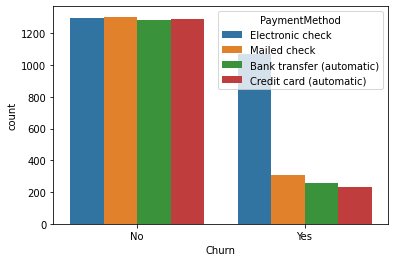

In [ ]:
sns.countplot(x='Churn',data=df, hue='PaymentMethod')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Tenure in Months')]

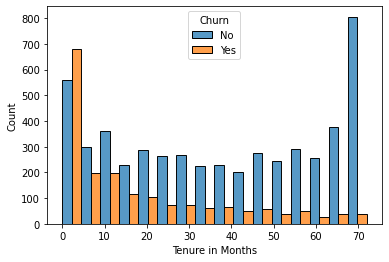

In [ ]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count")

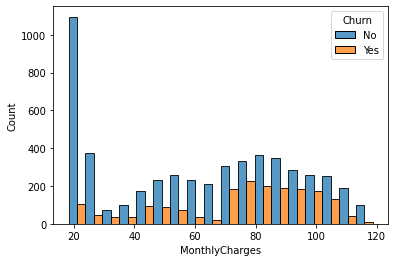

In [ ]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=df,multiple='dodge')

In [ ]:
df_copy = df.copy()

In [ ]:
# Đưa TotalCharges từ object  về float
df_copy['TotalCharges'] = pd.to_numeric(df_copy['TotalCharges'], errors='coerce')
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#xóa các dòng  NaN
df_copy=df_copy.dropna() 

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
# one hot encoding các dữ liệu ko phân cấp 
df_copy = pd.get_dummies(df_copy, columns=['gender', 'MultipleLines', 'InternetService', 'PaymentMethod', 'Contract'])
df_copy.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,Yes,No,1,No,No,Yes,No,No,No,No,Yes,29.85,29.85,No,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,0,No,No,34,Yes,Yes,No,Yes,No,No,No,No,56.95,1889.50,No,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0
3,0,No,No,45,No,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,0,No,No,2,Yes,No,No,No,No,No,No,Yes,70.70,151.65,Yes,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
def pre_process(text):
  if "Yes" in text:
    return 1
  if "No" in text:
    return 0
  return 2

In [ ]:
# label encoding các dữ liệu Yes Và No
df_copy['Partner'] = df_copy['Partner'].apply(lambda x: pre_process(x))
df_copy['Dependents'] = df_copy['Dependents'].apply(lambda x: pre_process(x))
df_copy['PhoneService'] = df_copy['PhoneService'].apply(lambda x: pre_process(x))
df_copy['OnlineSecurity'] = df_copy['OnlineSecurity'].apply(lambda x: pre_process(x))
df_copy['OnlineBackup'] = df_copy['OnlineBackup'].apply(lambda x: pre_process(x))
df_copy['DeviceProtection'] = df_copy['DeviceProtection'].apply(lambda x: pre_process(x))
df_copy['TechSupport'] = df_copy['TechSupport'].apply(lambda x: pre_process(x))
df_copy['StreamingTV'] = df_copy['StreamingTV'].apply(lambda x: pre_process(x))
df_copy['StreamingMovies'] = df_copy['StreamingMovies'].apply(lambda x: pre_process(x))
df_copy['PaperlessBilling'] = df_copy['PaperlessBilling'].apply(lambda x: pre_process(x))
df_copy['Churn'] = df_copy['Churn'].apply(lambda x: pre_process(x))
df_copy.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0
3,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   OnlineSecurity                           7032 non-null   int64  
 6   OnlineBackup                             7032 non-null   int64  
 7   DeviceProtection                         7032 non-null   int64  
 8   TechSupport                              7032 non-null   int64  
 9   StreamingTV                              7032 non-null   int64  
 10  StreamingMovies                          7032 no

**__ Chuẩn Bị dữ liệu để train __**

In [ ]:
y = df_copy['Churn'].values.reshape(-1,1)
X = df_copy.drop(columns=['Churn'])

In [ ]:
print('Dữ liệu ban đâu (số dòng, số cột ) : ',df_copy.shape)
print('Dữ liệu Đầu vào (số dòng, số cột ) : ',X.shape)
print('Dữ liệu nhãn Kết quả (số dòng, số cột ) : ',y.shape)

Dữ liệu ban đâu (số dòng, số cột ) :  (7032, 30)
Dữ liệu Đầu vào (số dòng, số cột ) :  (7032, 29)
Dữ liệu nhãn Kết quả (số dòng, số cột ) :  (7032, 1)


In [ ]:
# sử dụng thư viên from sklearn.model_selection import train_test_split để chia dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [ ]:
# sử dụng  LogisticRegression để huấn luyện mô hình
logreg=LogisticRegression()
logreg.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# sử dụng  accuracy_score
prediction_logreg = logreg.predict(X_test)
print( 'accuracy_score = ',accuracy_score(y_test,prediction_logreg))


accuracy_score =  0.8061611374407583


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


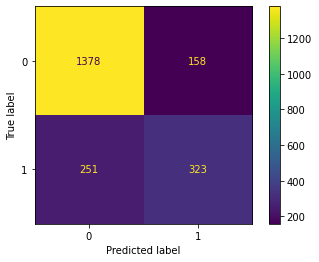

In [ ]:
# sử dụng  plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)

In [ ]:
# sử dung f1-score
y_pred = logreg.predict(X_test)
report = metrics.classification_report(y_test,prediction_logreg,digits=4) 
print (report)

              precision    recall  f1-score   support

           0     0.8459    0.8971    0.8708      1536
           1     0.6715    0.5627    0.6123       574

    accuracy                         0.8062      2110
   macro avg     0.7587    0.7299    0.7415      2110
weighted avg     0.7985    0.8062    0.8005      2110



In [ ]:
# nhân đôi dữ liệu với Churn = 1
df_copyx2=df_copy
df_copyx2 = df_copyx2.append(df_copyx2[df_copyx2['Churn']==1])

df_copyx2['Churn'].value_counts()


0    5163
1    3738
Name: Churn, dtype: int64

In [ ]:
df_copy['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
# chia lại X,y
y_resampled = df_copyx2['Churn'].values.reshape(-1,1)
X_resampled = df_copyx2.drop(columns=['Churn'])



In [ ]:
# chia lại train và test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3 , random_state=0)

In [ ]:
# chạy lại mô hình
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

# in accuracy_score
prediction_logreg = logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))

0.7802321228004493


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# in f1-score
y_pred = logreg.predict(X_test)
report = metrics.classification_report(y_test,prediction_logreg,digits=4) 
print (report)

              precision    recall  f1-score   support

           0     0.8197    0.8014    0.8105      1566
           1     0.7272    0.7502    0.7385      1105

    accuracy                         0.7802      2671
   macro avg     0.7735    0.7758    0.7745      2671
weighted avg     0.7814    0.7802    0.7807      2671



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


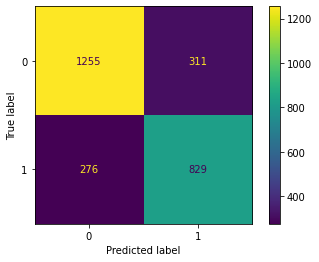

In [ ]:
# in confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)

In [ ]:
confusion_matrix(y_test,prediction_logreg)

array([[1255,  311],
       [ 276,  829]])

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/08/churn-prediction-commercial-use-of-data-science/
#https://www.kaggle.com/blastchar/telco-customer-churn/code